In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

Step 1: Load the JSON Resume Data

In [2]:
# Load the dataset
with open('Entity Recognition in Resumes.json', 'r', encoding='utf-8') as f:
    data = [json.loads(line) for line in f]

# Quick preview
print("Total resumes:", len(data))
print("Sample keys:", data[0].keys())

Total resumes: 220
Sample keys: dict_keys(['content', 'annotation', 'extras'])


Step 2: Convert Annotations to Structured Format

In [4]:
# Flatten annotations into a structured dataframe safely
records = []

for item in data:
    content = item.get('content', '')
    for annotation in item.get('annotation', []):
        labels = annotation.get('label', [])
        if not labels:  # Skip empty label lists
            continue
        label = labels[0]
        for point in annotation.get('points', []):
            records.append({
                'label': label,
                'text': point.get('text', '').strip(),
                'start': point.get('start', -1),
                'end': point.get('end', -1),
                'resume_text': content
            })

df = pd.DataFrame(records)
df.head()

,label,text,start,end,resume_text
0,Skills,"• Programming language: C, C++, Java\n• Oracle...",1295,1621,Abhishek Jha\nApplication Development Associat...
1,Skills,"C (Less than 1 year), Database (Less than 1 ye...",993,1153,Abhishek Jha\nApplication Development Associat...
2,College Name,Kendriya Vidyalaya,939,956,Abhishek Jha\nApplication Development Associat...
3,College Name,Woodbine modern school,883,904,Abhishek Jha\nApplication Development Associat...
4,Graduation Year,2017,856,860,Abhishek Jha\nApplication Development Associat...


Step 3: Visualize Entity Distribution

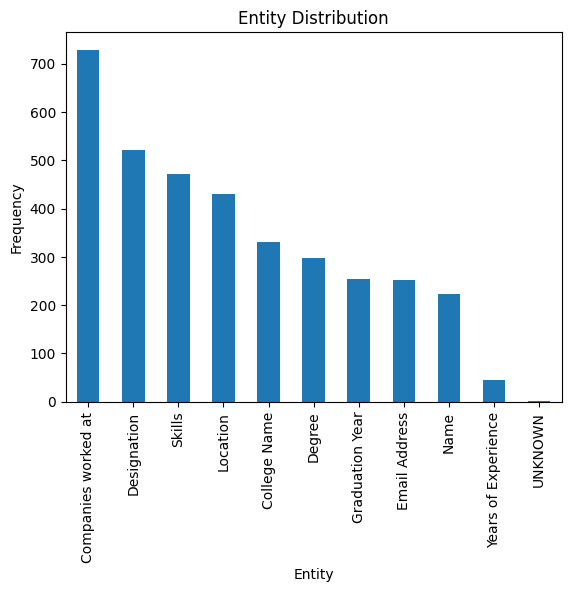

In [6]:
# Plot label counts
df['label'].value_counts().plot(kind='bar', title='Entity Distribution')
plt.xlabel('Entity')
plt.ylabel('Frequency')
plt.show()

Step 4: Create a Resume Parsing Function

In [7]:
def parse_resume(text, annotations):
    parsed = defaultdict(list)
    for ann in annotations:
        for pt in ann['points']:
            parsed[ann['label'][0]].append(pt['text'].strip())
    return dict(parsed)

Step 5: Try the Parser on a Resume

In [10]:
# Try on first resume
sample_resume = data[0]
parsed_output = parse_resume(sample_resume['content'], sample_resume['annotation'])

# Pretty display
import pprint
pprint.pprint(parsed_output)

{'College Name': ['Kendriya Vidyalaya',
                  'Woodbine modern school',
                  'B.v.b college of engineering and technology'],
 'Companies worked at': ['Accenture', 'Accenture'],
 'Designation': ['B.E in Information science and engineering',
                 'Application Development Associate',
                 'Application Development Associate'],
 'Email Address': ['Indeed: indeed.com/r/Abhishek-Jha/10e7a8cb732bc43a'],
 'Graduation Year': ['2017'],
 'Location': ['Bengaluru'],
 'Name': ['Abhishek Jha'],
 'Skills': ['• Programming language: C, C++, Java\n'
            '• Oracle PeopleSoft\n'
            '• Internet Of Things\n'
            '• Machine Learning\n'
            '• Database Management System\n'
            '• Computer Networks\n'
            '• Operating System worked on: Linux, Windows, Mac\n'
            '\n'
            'Non - Technical Skills\n'
            '\n'
            '• Honest and Hard-Working\n'
            '• Tolerant and Flexible to Diff